<a href="https://colab.research.google.com/github/IzhanAli08/Knowledge_Tracing/blob/main/Assist2017Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

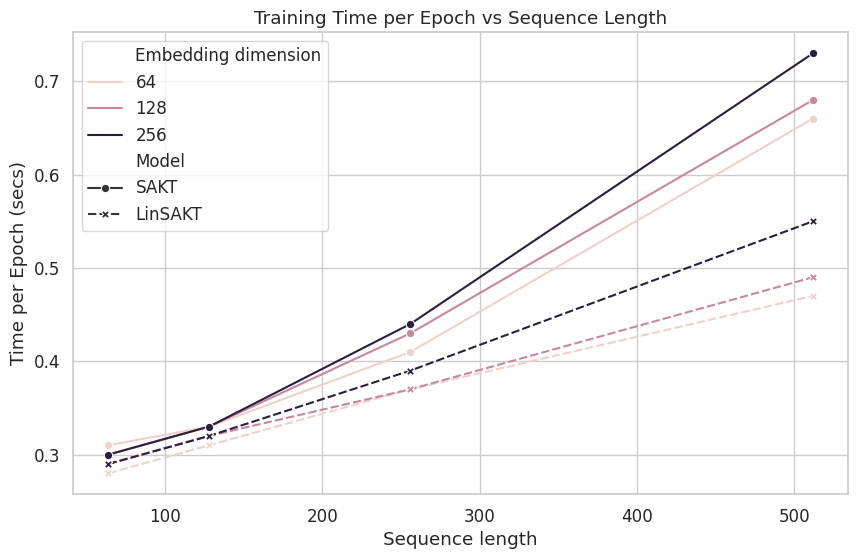

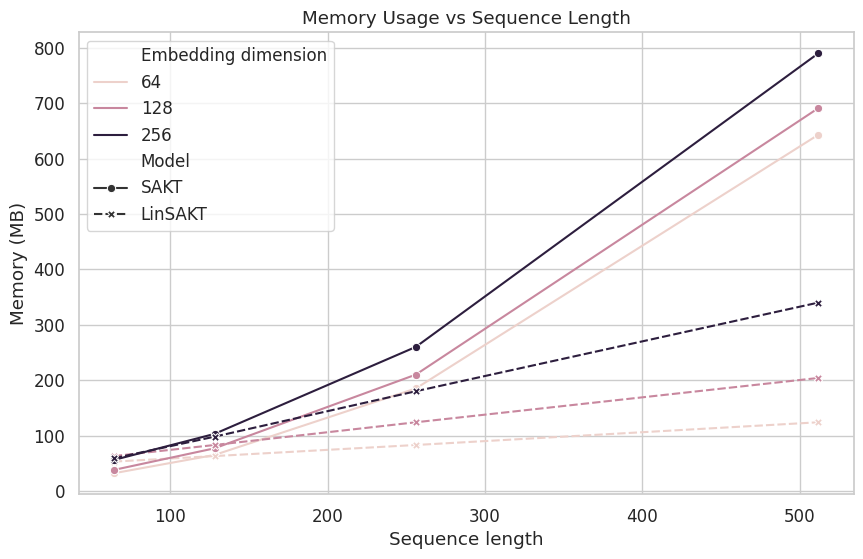

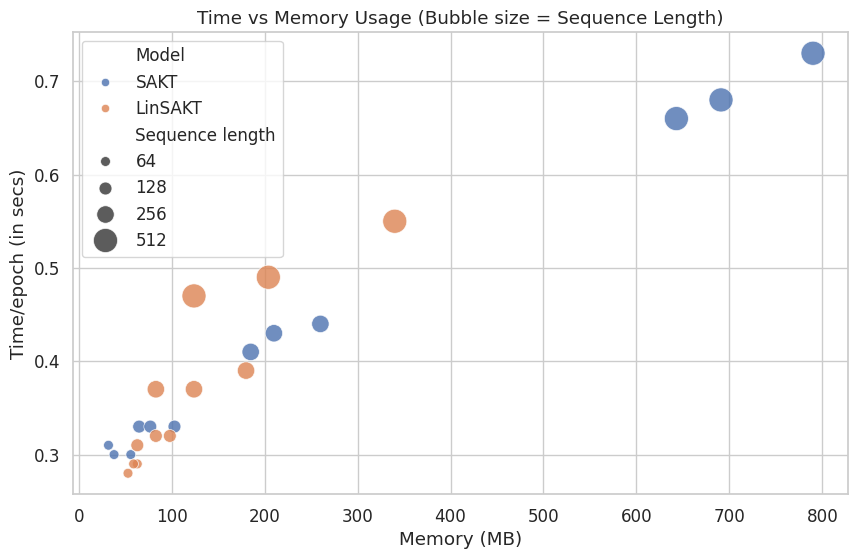

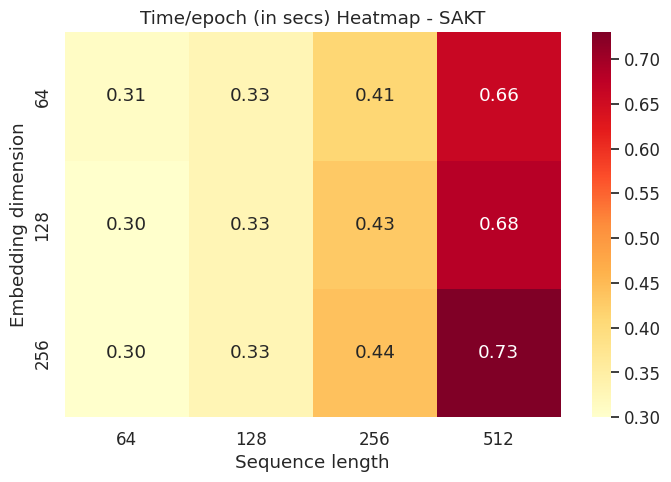

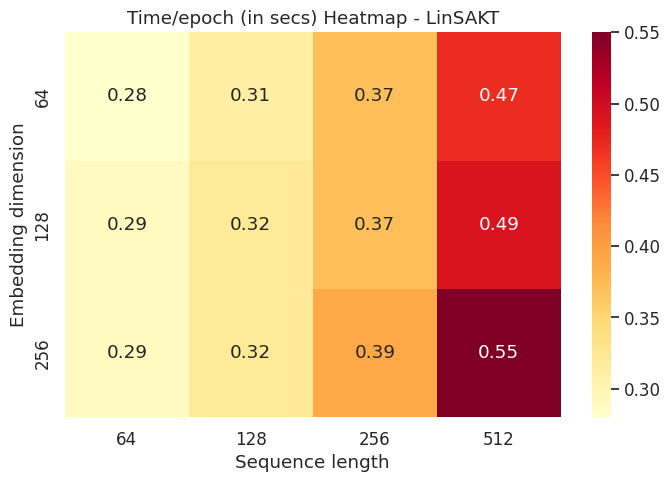

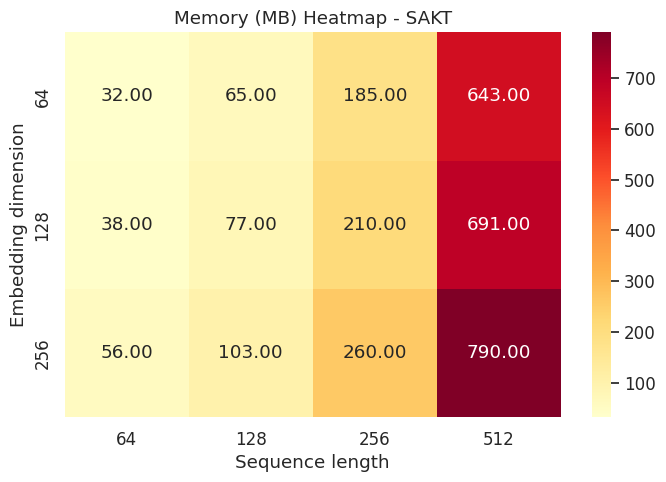

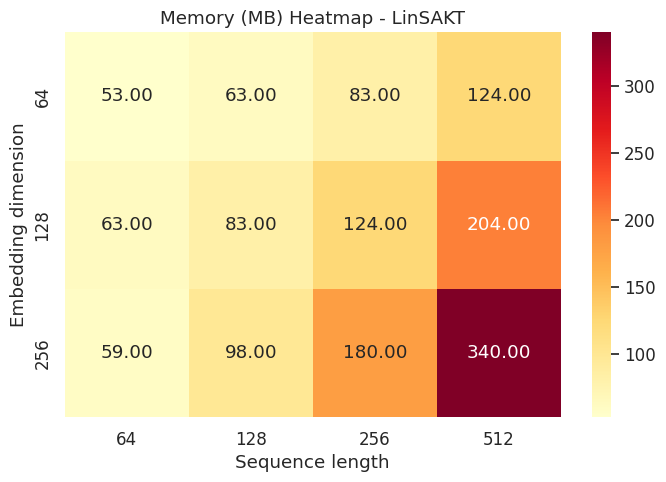

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Data
data = StringIO("""
Model,Embedding dimension,Sequence length,AUC,Accuracy,Precision,Recall,F1-score,Time/epoch (in secs),Memory (MB)
SAKT,64,64,0.57,0.60,0.61,0.89,0.73,0.31,32
SAKT,64,128,0.57,0.62,0.63,0.90,0.74,0.33,65
SAKT,64,256,0.59,0.63,0.64,0.92,0.75,0.41,185
SAKT,64,512,0.59,0.64,0.64,0.93,0.76,0.66,643
SAKT,128,64,0.60,0.62,0.63,0.85,0.73,0.30,38
SAKT,128,128,0.58,0.62,0.64,0.87,0.74,0.33,77
SAKT,128,256,0.60,0.63,0.65,0.89,0.75,0.43,210
SAKT,128,512,0.62,0.64,0.65,0.90,0.76,0.68,691
SAKT,256,64,0.58,0.60,0.63,0.81,0.71,0.30,56
SAKT,256,128,0.58,0.61,0.64,0.85,0.73,0.33,103
SAKT,256,256,0.60,0.63,0.65,0.86,0.74,0.44,260
SAKT,256,512,0.61,0.64,0.65,0.89,0.75,0.73,790
LinSAKT,64,64,0.57,0.61,0.61,0.93,0.74,0.28,53
LinSAKT,64,128,0.58,0.62,0.63,0.93,0.75,0.31,63
LinSAKT,64,256,0.59,0.63,0.64,0.95,0.76,0.37,83
LinSAKT,64,512,0.59,0.63,0.64,0.96,0.76,0.47,124
LinSAKT,128,64,0.59,0.62,0.64,0.87,0.74,0.29,63
LinSAKT,128,128,0.59,0.63,0.63,0.90,0.75,0.32,83
LinSAKT,128,256,0.60,0.64,0.64,0.92,0.76,0.37,124
LinSAKT,128,512,0.61,0.64,0.65,0.93,0.76,0.49,204
LinSAKT,256,64,0.60,0.62,0.64,0.87,0.74,0.29,59
LinSAKT,256,128,0.61,0.63,0.64,0.89,0.75,0.32,98
LinSAKT,256,256,0.60,0.64,0.65,0.90,0.76,0.39,180
LinSAKT,256,512,0.62,0.64,0.65,0.90,0.76,0.55,340
""")

df = pd.read_csv(data)

sns.set(style="whitegrid", font_scale=1.1)

# 1. Time vs Sequence Length (per embedding dimension)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Sequence length", y="Time/epoch (in secs)",
             hue="Embedding dimension", style="Model", markers=True)
plt.title("Training Time per Epoch vs Sequence Length")
plt.ylabel("Time per Epoch (secs)")
plt.show()

# 2. Memory vs Sequence Length (per embedding dimension)
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Sequence length", y="Memory (MB)",
             hue="Embedding dimension", style="Model", markers=True)
plt.title("Memory Usage vs Sequence Length")
plt.ylabel("Memory (MB)")
plt.show()

# 3. Time vs Memory scatter (size = sequence length)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Memory (MB)", y="Time/epoch (in secs)",
                hue="Model", size="Sequence length", sizes=(50, 300), alpha=0.8)
plt.title("Time vs Memory Usage (Bubble size = Sequence Length)")
plt.show()

# 4. Heatmaps for Time and Memory efficiency
for metric in ["Time/epoch (in secs)", "Memory (MB)"]:
    for model in df["Model"].unique():
        pivot_df = df[df["Model"] == model].pivot(index="Embedding dimension", columns="Sequence length", values=metric)
        plt.figure(figsize=(8,5))
        sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlOrRd")
        plt.title(f"{metric} Heatmap - {model}")
        plt.show()